In [1]:
import sys
sys.path.append('../../../scripts/')

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from tqdm import tqdm
from scipy.stats import norm
from scipy import integrate

from mh_simulation import *
from mh_theory import *

In [2]:
display.set_matplotlib_formats('svg')

### Figure 2A, cluster size

In [3]:
N = 100
M = 100
P = 20
K = 20 
Nc = 2100
delta_eta=0.3
delta_sigma_list1=np.linspace(1e-6,1.0,11)
f_list1=[0.05,0.01,0.1]
repeat_num=200

In [4]:
# Simulation, it takes about half an hour to run
record1_1 = np.zeros((3,11))
p1,p2,p3=[0.2,0.2,0.6]

for i,f in enumerate(tqdm(f_list1)):
    
    for j,delta_sigma in enumerate(delta_sigma_list1):
        
        model2 = hetero_forward2(N,M,P,K,Nc,p1,p2,p3)

        model2.generate_input()

        h,m= model2.feed(f,f,f)

        m_center = m.copy()

        center_0 = model2.data_0.copy()
        center_1 = model2.data_1.copy()

        temp_dm_record = np.zeros(repeat_num)

        for repeat in range(repeat_num):

            model2.data_0 = flip_matrix(center_0,delta_sigma)
            model2.data_1 = flip_matrix(center_1,delta_eta)

            h,m = model2.feed(f,f,f,initial_J=False)

            temp_dm_record[repeat] = cal_delta_m_hetero(m,m_center,p1,p2,p3,f,f,f) 

        record1_1[i,j] = np.mean(temp_dm_record)

        
record1_2 = np.zeros((3,11))
p1,p2,p3=[1.0,0.0,0.0]

for i,f in enumerate(tqdm(f_list1)):
    
    for j,delta_sigma in enumerate(delta_sigma_list1):
        
        model2 = hetero_forward2(N,M,P,K,Nc,p1,p2,p3)

        model2.generate_input()

        h,m = model2.feed(f,f,f)

        m_center = m.copy()

        center_0 = model2.data_0.copy()
        center_1 = model2.data_1.copy()

        temp_dm_record = np.zeros(repeat_num)

        for repeat in range(repeat_num):

            model2.data_0 = flip_matrix(center_0,delta_sigma)
            model2.data_1 = flip_matrix(center_1,delta_eta)

            h,m = model2.feed(f,f,f,initial_J=False)

            temp_dm_record[repeat] = cal_delta_m_hetero(m,m_center,p1,p2,p3,f,f,f) 

        record1_2[i,j] = np.mean(temp_dm_record)

record1_3 = np.zeros((3,11))
p1,p2,p3=[0.0,1.0,0.0]

for i,f in enumerate(tqdm(f_list1)):
    
    for j,delta_sigma in enumerate(delta_sigma_list1):
        
        model2 = hetero_forward2(N,M,P,K,Nc,p1,p2,p3)

        model2.generate_input()

        h,m = model2.feed(f,f,f)

        m_center = m.copy()

        center_0 = model2.data_0.copy()
        center_1 = model2.data_1.copy()

        temp_dm_record = np.zeros(repeat_num)

        for repeat in range(repeat_num):

            model2.data_0 = flip_matrix(center_0,delta_sigma)
            model2.data_1 = flip_matrix(center_1,delta_eta)

            h,m = model2.feed(f,f,f,initial_J=False)

            temp_dm_record[repeat] = cal_delta_m_hetero(m,m_center,p1,p2,p3,f,f,f) 

        record1_3[i,j] = np.mean(temp_dm_record)

record1_4 = np.zeros((3,11))
p1,p2,p3=[0.0,0.0,1.0]

for i,f in enumerate(tqdm(f_list1)):
    
    for j,delta_sigma in enumerate(delta_sigma_list1):
        
        model2 = hetero_forward2(N,M,P,K,Nc,p1,p2,p3)

        model2.generate_input()

        h,m = model2.feed(f,f,f)

        m_center = m.copy()

        center_0 = model2.data_0.copy()
        center_1 = model2.data_1.copy()

        temp_dm_record = np.zeros(repeat_num)

        for repeat in range(repeat_num):

            model2.data_0 = flip_matrix(center_0,delta_sigma)
            model2.data_1 = flip_matrix(center_1,delta_eta)

            h,m = model2.feed(f,f,f,initial_J=False)

            temp_dm_record[repeat] = cal_delta_m_hetero(m,m_center,p1,p2,p3,f,f,f) 

        record1_4[i,j] = np.mean(temp_dm_record)

100%|██████████| 3/3 [08:27<00:00, 169.30s/it]


In [5]:
# Theory
delta_sigma_list2 = np.linspace(1e-6,1.00,num=100)
theory_record_1_1 = np.zeros((3,100))
p1,p2,p3=[0.2,0.2,0.6]

for i,f in enumerate(tqdm(f_list1)):
    T = norm.ppf(1-f)
    for j,delta_sigma in enumerate(delta_sigma_list2):
        theory_record_1_1[i,j] = delta_m_hetero_theory(p1,p2,p3,f,T,f,T,f,T,delta_sigma,delta_eta)


theory_record_1_2 = np.zeros((3,100))
p1,p2,p3=[1.0,0.0,0.0]

for i,f in enumerate(tqdm(f_list1)):
    T = norm.ppf(1-f)
    for j,delta_sigma in enumerate(delta_sigma_list2):
        theory_record_1_2[i,j] = delta_m_hetero_theory(p1,p2,p3,f,T,f,T,f,T,delta_sigma,delta_eta)
        
theory_record_1_3 = np.zeros((3,100))
p1,p2,p3=[0.0,1.0,0.0]

for i,f in enumerate(tqdm(f_list1)):
    T = norm.ppf(1-f)
    for j,delta_sigma in enumerate(delta_sigma_list2):
        theory_record_1_3[i,j] = delta_m_hetero_theory(p1,p2,p3,f,T,f,T,f,T,delta_sigma,delta_eta)

        
theory_record_1_4 = np.zeros((3,100))
p1,p2,p3=[0.0,0.0,1.0]

for i,f in enumerate(tqdm(f_list1)):
    T = norm.ppf(1-f)
    for j,delta_sigma in enumerate(delta_sigma_list2):
        theory_record_1_4[i,j] = delta_m_hetero_theory(p1,p2,p3,f,T,f,T,f,T,delta_sigma,delta_eta)

100%|██████████| 3/3 [00:05<00:00,  1.85s/it]


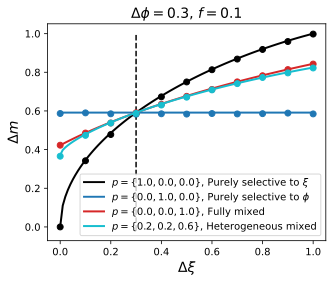

In [6]:
plt.figure(figsize=[5,4])
plt.plot(delta_sigma_list1,record1_2[2,:],'o',color='black')
plt.plot(delta_sigma_list2,theory_record_1_2[2,:],'-',lw=2, color='black', label=r'$p=\{1.0,0.0,0.0\}$, Purely selective to $\xi$')
plt.plot(delta_sigma_list1,record1_3[2,:],'o',color='tab:blue')
plt.plot(delta_sigma_list2,theory_record_1_3[2,:],'-',lw=2, color='tab:blue', label=r'$p=\{0.0,1.0,0.0\}$, Purely selective to $\phi$')
plt.plot(delta_sigma_list1,record1_4[2,:],'o',color='tab:red')
plt.plot(delta_sigma_list2,theory_record_1_4[2,:],'-',lw=2, color='tab:red', label=r'$p=\{0.0,0.0,1.0\}$, Fully mixed')
plt.plot(delta_sigma_list1,record1_1[2,:],'o',color='tab:cyan')
plt.plot(delta_sigma_list2,theory_record_1_1[2,:],'-',lw=2, color='tab:cyan', label=r'$p=\{0.2,0.2,0.6\}$, Heterogeneous mixed')

plt.vlines(0.3,ymin=-0.02,ymax=1.00, linestyle='--', color='black')
plt.title(r'$\Delta \phi=0.3$, $f=0.1$',fontsize=14)
plt.xlabel(r'$\Delta \xi$',fontsize=14)
plt.ylabel(r'$\Delta m$',fontsize=14)
plt.legend()
plt.savefig('2A.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

### 2B

In [7]:
N = 100
M = 100
P = 20
K = 20 
Nc = 2100
f_list2=np.linspace(0.01,0.5,11)
delta_list2=[0.1,0.4]
repeat_num=200

In [8]:
# Simulation
record2_1 = np.zeros((2,11))
p1,p2,p3=[0.2,0.2,0.6]
for i,f in enumerate(tqdm(f_list2)):
    
    for j,delta in enumerate(delta_list2):
        
        model2 = hetero_forward2(N,M,P,K,Nc,p1,p2,p3)

        model2.generate_input()

        h,m= model2.feed(f,f,f)

        m_center = m.copy()

        center_0 = model2.data_0.copy()
        center_1 = model2.data_1.copy()

        temp_dm_record = np.zeros(repeat_num)

        for repeat in range(repeat_num):

            model2.data_0 = flip_matrix(center_0,delta)
            model2.data_1 = flip_matrix(center_1,delta)

            h,m = model2.feed(f,f,f,initial_J=False)

            temp_dm_record[repeat] = cal_delta_m_hetero(m,m_center,p1,p2,p3,f,f,f) 

        record2_1[j,i] = np.mean(temp_dm_record)

record2_2 = np.zeros((2,11))
p1,p2,p3=[1.0,0.0,0.0]
for i,f in enumerate(tqdm(f_list2)):
    
    for j,delta in enumerate(delta_list2):
        
        model2 = hetero_forward2(N,M,P,K,Nc,p1,p2,p3)

        model2.generate_input()

        h,m= model2.feed(f,f,f)

        m_center = m.copy()

        center_0 = model2.data_0.copy()
        center_1 = model2.data_1.copy()

        temp_dm_record = np.zeros(repeat_num)

        for repeat in range(repeat_num):

            model2.data_0 = flip_matrix(center_0,delta)
            model2.data_1 = flip_matrix(center_1,delta)

            h,m = model2.feed(f,f,f,initial_J=False)

            temp_dm_record[repeat] = cal_delta_m_hetero(m,m_center,p1,p2,p3,f,f,f) 

        record2_2[j,i] = np.mean(temp_dm_record)

record2_3 = np.zeros((2,11))
p1,p2,p3=[0.0,1.0,0.0]

for i,f in enumerate(tqdm(f_list2)):
    
    for j,delta in enumerate(delta_list2):
        
        model2 = hetero_forward2(N,M,P,K,Nc,p1,p2,p3)

        model2.generate_input()

        h,m= model2.feed(f,f,f)

        m_center = m.copy()

        center_0 = model2.data_0.copy()
        center_1 = model2.data_1.copy()

        temp_dm_record = np.zeros(repeat_num)

        for repeat in range(repeat_num):

            model2.data_0 = flip_matrix(center_0,delta)
            model2.data_1 = flip_matrix(center_1,delta)

            h,m = model2.feed(f,f,f,initial_J=False)

            temp_dm_record[repeat] = cal_delta_m_hetero(m,m_center,p1,p2,p3,f,f,f) 

        record2_3[j,i] = np.mean(temp_dm_record)

100%|██████████| 11/11 [05:14<00:00, 28.58s/it]


In [9]:
# Theory
f_list3 = np.linspace(0.005,0.5,100)

theory_record_2_1 = np.zeros((2,100))
p1,p2,p3=[0.2,0.2,0.6]
for i,f in enumerate(tqdm(f_list3)):
    T = norm.ppf(1-f)
    for j,delta in enumerate(delta_list2):
        theory_record_2_1[j,i] = delta_m_hetero_theory(p1,p2,p3,f,T,f,T,f,T,delta,delta)

        
theory_record_2_2 = np.zeros((2,100))
p1,p2,p3=[1.0,0.0,0.0]
for i,f in enumerate(tqdm(f_list3)):
    T = norm.ppf(1-f)
    for j,delta in enumerate(delta_list2):
        theory_record_2_2[j,i] = delta_m_hetero_theory(p1,p2,p3,f,T,f,T,f,T,delta,delta)

theory_record_2_3 = np.zeros((2,100))
p1,p2,p3=[0.0,1.0,0.0]
for i,f in enumerate(tqdm(f_list3)):
    T = norm.ppf(1-f)
    for j,delta in enumerate(delta_list2):
        theory_record_2_3[j,i] = delta_m_hetero_theory(p1,p2,p3,f,T,f,T,f,T,delta,delta)

100%|██████████| 100/100 [00:03<00:00, 25.10it/s]


In [11]:
record2_4 = np.zeros((2,11))
p1,p2,p3=[0.0,0.0,1.0]

for i,f in enumerate(tqdm(f_list2)):
    
    for j,delta in enumerate(delta_list2):
        
        model2 = hetero_forward2(N,M,P,K,Nc,p1,p2,p3)

        model2.generate_input()

        h,m= model2.feed(f,f,f)

        m_center = m.copy()

        center_0 = model2.data_0.copy()
        center_1 = model2.data_1.copy()

        temp_dm_record = np.zeros(repeat_num)

        for repeat in range(repeat_num):

            model2.data_0 = flip_matrix(center_0,delta)
            model2.data_1 = flip_matrix(center_1,delta)

            h,m = model2.feed(f,f,f,initial_J=False)

            temp_dm_record[repeat] = cal_delta_m_hetero(m,m_center,p1,p2,p3,f,f,f) 

        record2_4[j,i] = np.mean(temp_dm_record)
        
theory_record_2_4 = np.zeros((2,100))
p1,p2,p3=[0.0,0.0,1.0]

for i,f in enumerate(tqdm(f_list3)):
    T = norm.ppf(1-f)
    for j,delta in enumerate(delta_list2):
        theory_record_2_4[j,i] = delta_m_hetero_theory(p1,p2,p3,f,T,f,T,f,T,delta,delta)

100%|██████████| 100/100 [00:04<00:00, 24.98it/s]


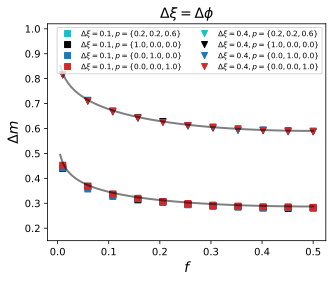

In [12]:
# Plot Figure
plt.figure(figsize=[5,4])
plt.plot(f_list2,record2_1[0,:],'s',color='tab:cyan',label=r'$\Delta \xi=0.1,p=\{0.2,0.2,0.6\}$')
plt.plot(f_list2,record2_2[0,:],'s',color='black', label=r'$\Delta \xi=0.1,p=\{1.0,0.0,0.0\}$')
plt.plot(f_list2,record2_3[0,:],'s',color='tab:blue',label=r'$\Delta \xi=0.1,p=\{0.0,1.0,0.0\}$')
plt.plot(f_list2,record2_4[0,:],'s',color='tab:red',label=r'$\Delta \xi=0.1,p=\{0.0,0.0,1.0\}$')
plt.plot(f_list3,theory_record_2_4[0,:],'-',lw=2, color='black', alpha=0.5)

plt.plot(f_list2,record2_1[1,:],'v',color='tab:cyan',label=r'$\Delta \xi=0.4,p=\{0.2,0.2,0.6\}$',)
plt.plot(f_list2,record2_2[1,:],'v',color='black', label=r'$\Delta \xi=0.4, p=\{1.0,0.0,0.0\}$')
plt.plot(f_list2,record2_3[1,:],'v',color='tab:blue',label=r'$\Delta \xi=0.4,p=\{0.0,1.0,0.0\}$')
plt.plot(f_list2,record2_4[1,:],'v',color='tab:red',label=r'$\Delta \xi=0.4,p=\{0.0,0.0,1.0\}$')
plt.plot(f_list3,theory_record_2_4[1,:],'-',lw=2, color='black', alpha=0.5)
plt.legend(ncol=2,fontsize=7.5)
plt.title(r'$\Delta \xi=\Delta \phi$',fontsize=14)
plt.xlabel(r'$f$',fontsize=14)
plt.ylabel(r'$\Delta m$',fontsize=14)
plt.ylim(0.15,1.02)
#plt.legend([r'$p=\{1.0,0.0,0.0\}$'])
plt.savefig('2B.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

### Figure 2D

In [13]:
from heterogeneous_model import *
from sparseness_expansion import *

In [20]:
# Null Model
H=2100
P=10
K=10
th=0.8
h=np.random.normal(0,1,size=(P*K,H))
# Fix sparsity
m = h.copy()
m[h>th] = 1
m[h<th] = 0
dm = function_G(0.1,function_H(0.8),0.8)
m_noise = flip_matrix(m,dm)
cov_null = np.matmul((m-erf1(th)),(m_noise-erf1(th)).T)/H

In [15]:
N=100
H=2100
P=100
K=1
ds=0.1
dc=0.1
th=0.8
f = erf1(th)

p1=1
p2=0
p3=0

o_stats=np.array([])
for i in tqdm(range(10)):
    h_small,h_test_small = generate_hetergeneous(H,N,P,K,p1,p2,p3,d_stim=ds,d_cont=dc)
    o_small = 0.5*(np.sign(h_small-th)+1) - f
    o_small_test = 0.5*(np.sign(h_test_small-th)+1) - f
    cov_small = (1/H)*np.matmul(o_small.T,o_small_test)
    o1 = cov_small.reshape(-1)
    o_stats=np.concatenate((o_stats,o1))

100%|██████████| 10/10 [00:00<00:00, 22.09it/s]


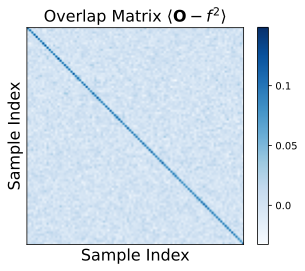

In [21]:
fig = plt.figure(figsize=(5,4))
plt.title(r'Overlap Matrix $\langle\mathbf{O}-f^2\rangle$', fontsize=16)
plt.imshow(cov_small,cmap="Blues")

cbar = plt.colorbar()
cbar.set_ticks([0, 0.05, 0.10, 0.15])
cbar.set_ticklabels([0.00, 0.05, 0.10, 0.15])
plt.xticks([])
plt.yticks([])
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Sample Index', fontsize=16)
plt.savefig('2D_left.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


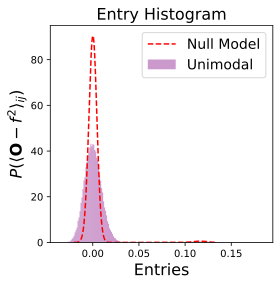

In [22]:
fig = plt.figure(figsize=(4,4))
ax2 = fig.add_subplot(111)
ax2.set_title(r'Entry Histogram',fontsize=16)
sns.distplot(o_stats, norm_hist=True, bins=200,kde=False,label='Unimodal', color='purple')
sns.distplot(cov_null.reshape(-1), norm_hist=True, kde_kws={'linestyle':'--'}, hist=False, color='red', label="Null Model")
ax2.set_xlabel(r'Entries',fontsize=16)
ax2.set_ylabel(r'$P(\langle\mathbf{O}-f^2\rangle_{ij})$',fontsize=16)
ax2.legend(fontsize=14)
ax2.set_xlim(-0.046,0.195)
plt.savefig('2D_right.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

### Figure 2E

In [23]:
# Null Model
H=2100
P=10
K=10
th=0.8
h=np.random.normal(0,1,size=(P*K,H))
# Fix sparsity
m = h.copy()
m[h>th] = 1
m[h<th] = 0
dm = function_G(0.1,function_H(0.8),0.8)
m_noise = flip_matrix(m,dm)
cov_null = np.matmul((m-erf1(th)),(m_noise-erf1(th)).T)/H

In [24]:
N=100
H=2100
P=10
K=10
ds=0.1
dc=0.1
th=0.8

p3=0.4
p2=0.1
p1=0.5
f = erf1(th)

o_stats=np.array([])
for i in tqdm(range(10)):
    h_small,h_test_small = generate_hetergeneous(H,N,P,K,p1,p2,p3,d_stim=ds,d_cont=dc)
    o_small = 0.5*(np.sign(h_small-th)+1) - f
    o_small_test = 0.5*(np.sign(h_test_small-th)+1) - f
    cov_small = (1/H)*np.matmul(o_small.T,o_small_test)
    o1 = cov_small.reshape(-1)
    o_stats=np.concatenate((o_stats,o1))

100%|██████████| 10/10 [00:00<00:00, 35.85it/s]


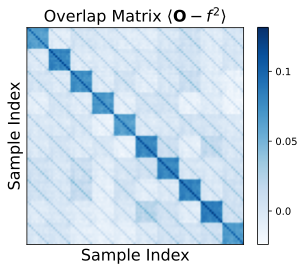

In [25]:
fig = plt.figure(figsize=(5,4))
plt.title(r'Overlap Matrix $\langle\mathbf{O}-f^2\rangle$', fontsize=16)
plt.imshow(cov_small, cmap='Blues')

cbar = plt.colorbar()
cbar.set_ticks([0, 0.05, 0.10, 0.15])
cbar.set_ticklabels([0.00, 0.05, 0.10, 0.15])
plt.xticks([])
plt.yticks([])
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Sample Index', fontsize=16)
plt.savefig('2E_left.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


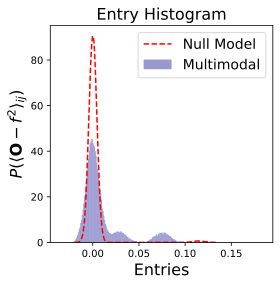

In [26]:
fig = plt.figure(figsize=(4,4))
ax2 = fig.add_subplot(111)
ax2.set_title(r'Entry Histogram',fontsize=16)
sns.distplot(o_stats, norm_hist=True,bins=200, kde=False, label="Multimodal", color="darkblue")
sns.distplot(cov_null.reshape(-1), norm_hist=True, kde_kws={'linestyle':'--'}, hist=False, color='red', label="Null Model")
ax2.set_xlabel(r'Entries',fontsize=16)
ax2.set_ylabel(r'$P(\langle\mathbf{O}-f^2\rangle_{ij})$',fontsize=16)
ax2.legend(fontsize=14)
ax2.set_xlim(-0.046,0.195)
plt.savefig('2E_right.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

### Figure 2F

In [27]:
###THREE SEPARATE CONFIGURATIONS - COMPARE
#Config 1 --> unimodal
N=100
H=2100
P1=1600
K1=1
dstim=0.1
dcont=0.1

p1_1=1
p2_1=0
p3_1=0

#Config 2 (symm) --> {} = {0.3,0.3,0.4}
N=100
H=2100
P=40
K=40
dstim=0.1
dcont=0.1

p1_2=0.5
p2_2=0.1
p3_2=0.4

#Config 3 (symm) --> {} = {0.,0.,1.0}
N=100
H=2100
P=40
K=40
dstim=0.1
dcont=0.1

p1_3=0.0
p2_3=0.0
p3_3=1.0

In [28]:
th = 0.8
f = erf1(th)
h1,h_test1 = generate_hetergeneous(H,N,P1,K1,p1_1,p2_1,p3_1,d_stim=dstim,d_cont=dcont)
o1 = 0.5*(np.sign(h1 - th) + 1) - f
o1_test = 0.5*(np.sign(h_test1 - th) + 1) - f
cov1 = (1/H)*np.matmul(o1.T,o1_test)
eigs1 = LA.eigvals(cov1)

h2,h_test2 = generate_hetergeneous(H,N,P,K,p1_2,p2_2,p3_2,d_stim=dstim,d_cont=dcont)
o2 = 0.5*(np.sign(h2 - th) + 1) - f
o2_test = 0.5*(np.sign(h_test2 - th) + 1) - f
cov2 = (1/H)*np.matmul(o2.T,o2_test)
eigs2 = LA.eigvals(cov2)


h3,h_test3 = generate_hetergeneous(H,N,P,K,p1_3,p2_3,p3_3,d_stim=dstim,d_cont=dcont)
o3 = 0.5*(np.sign(h3 - th) + 1) - f
o3_test = 0.5*(np.sign(h_test3 - th) + 1) - f
cov3 = (1/H)*np.matmul(o3.T,o3_test)
eigs3 = LA.eigvals(cov3)

h_null=np.random.normal(0,1,size=(P*K,H))
m_null = h_null.copy()
m_null[h_null>th] = 1
m_null[h_null<th] = 0
dm = function_G(dstim,f,th)
m_noise = flip_matrix(m_null,dm)
cov_null = np.matmul((m_null-f),(m_noise-f).T)/H
eigs_null = LA.eigvals(cov_null)

/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


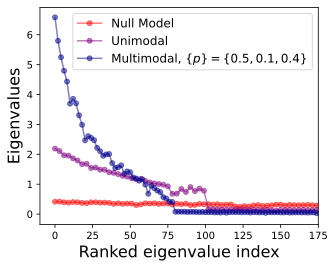

In [30]:
step=3
plt.figure(figsize=[5,4])
plt.plot(np.arange(0,1600,step),eigs_null[::step],'o-',color='red',alpha=0.5,ms=5,label=r'Null Model')
plt.plot(np.arange(0,1600,3),eigs1[::3],'o-',color='purple',alpha=0.5,ms=5,label=r'Unimodal')
plt.plot(np.arange(0,1600,2),eigs2[::2],'o-',color='darkblue', alpha=0.5,ms=5,label=r'Multimodal, $\{ p \} = \{ 0.5,0.1,0.4 \}$')

plt.xlabel(r'Ranked eigenvalue index',fontsize=16)
plt.ylabel(r'Eigenvalues',fontsize=16)
plt.xlim(-10,175)
plt.legend(fontsize=12)
plt.savefig('2F.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()